In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
%matplotlib inline


In [18]:
# Load Netflix dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Preview the dataset
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
# Check shape and data types
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Check for missing values
df.isnull().sum()


Dataset Shape: (8807, 12)

Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [22]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Strip whitespaces from column names
df.columns = df.columns.str.strip()

# Fill missing values for now with placeholder text
df.fillna('Unknown', inplace=True)


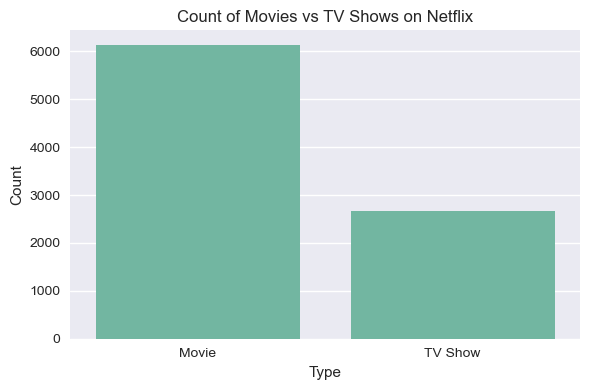

In [24]:
# Count of each type
type_counts = df['type'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


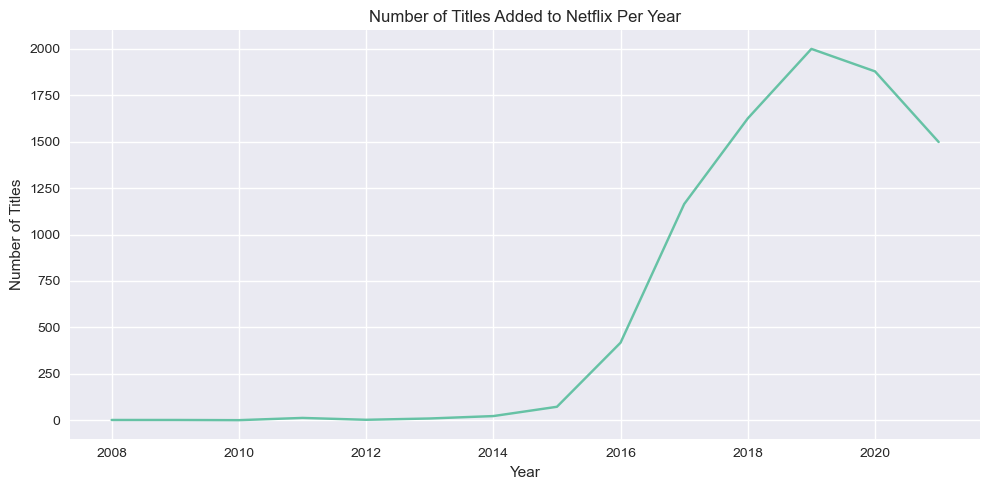

In [26]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Count content per year
content_per_year = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values)
plt.title("Number of Titles Added to Netflix Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


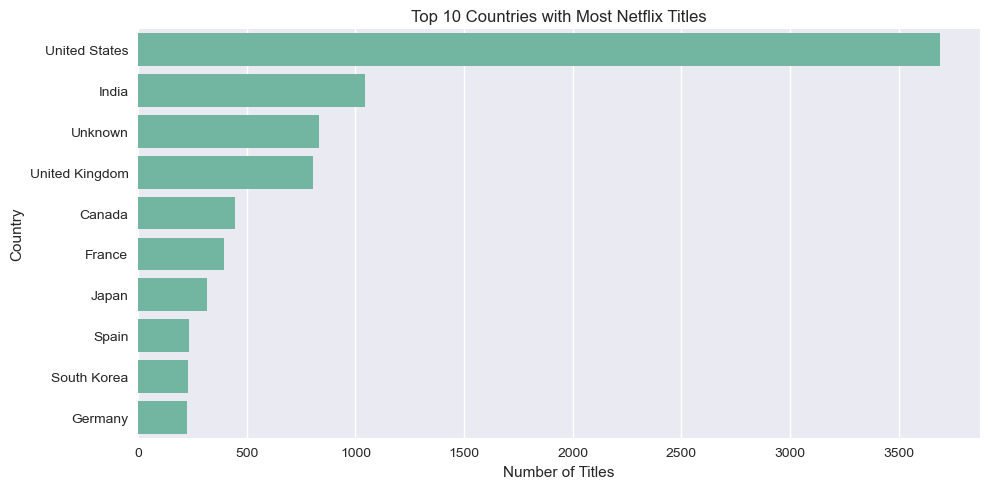

In [28]:
# Some entries have multiple countries, split and count individually
country_series = df['country'].dropna().str.split(', ')
countries = country_series.explode()

# Top 10 countries
top_countries = countries.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


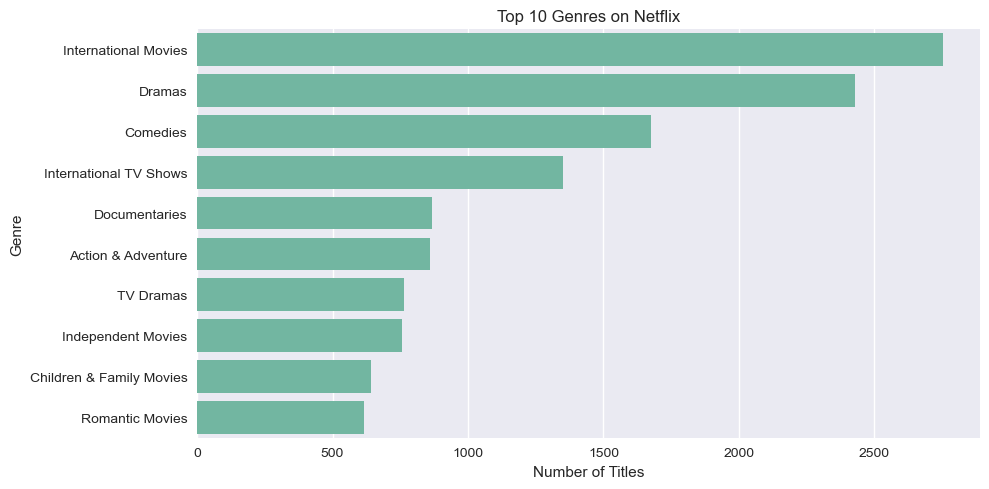

In [23]:
# Split and explode genres
genre_series = df['listed_in'].str.split(', ')
genres = genre_series.explode()

# Top 10 genres
top_genres = genres.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


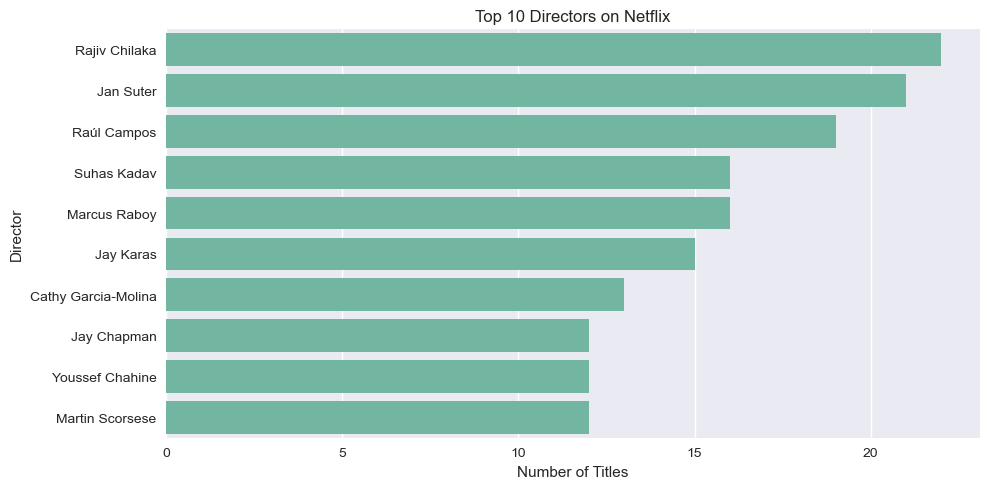

In [30]:
# Remove 'Unknown' and split multiple directors
directors = df[df['director'] != 'Unknown']['director'].str.split(', ')
directors_exploded = directors.explode()

# Top 10
top_directors = directors_exploded.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

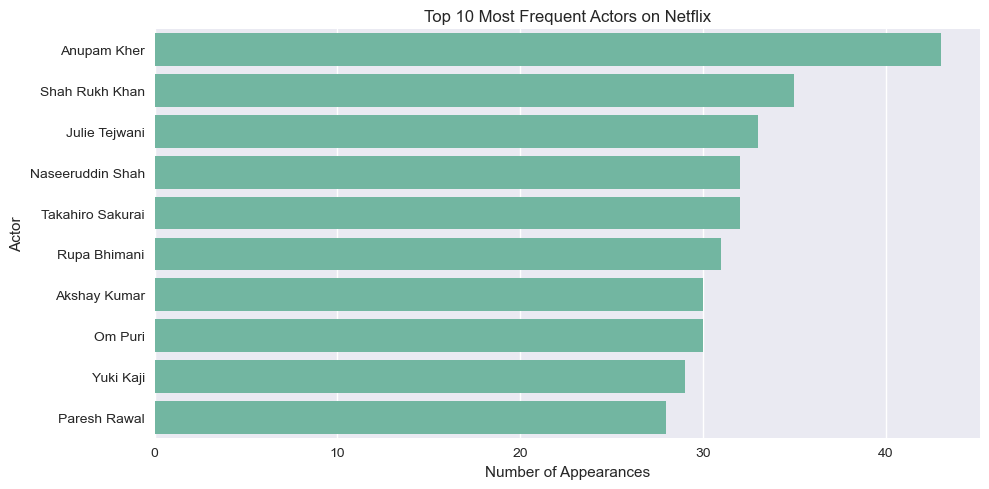

In [32]:
# Remove 'Unknown' and split multiple actors
cast = df[df['cast'] != 'Unknown']['cast'].str.split(', ')
cast_exploded = cast.explode()

# Top 10 actors
top_actors = cast_exploded.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.tight_layout()
plt.show()


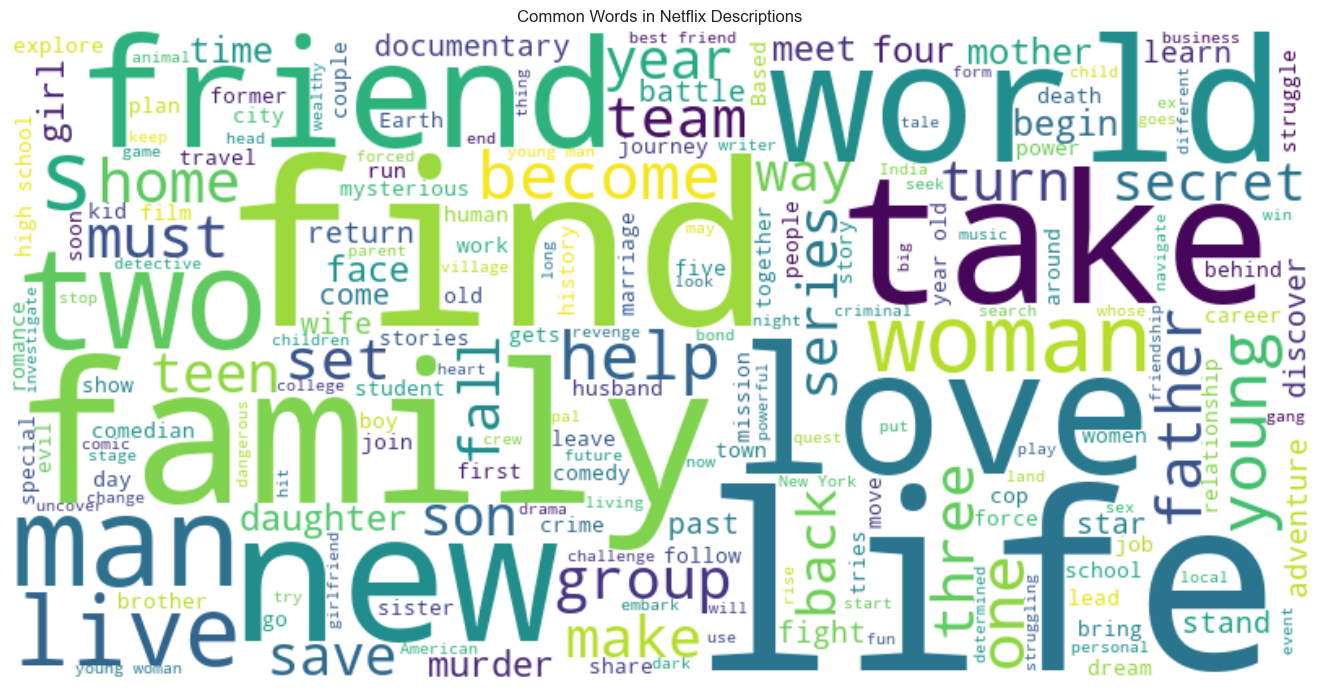

In [34]:
from wordcloud import WordCloud

# Combine all descriptions into one string
text = " ".join(df['description'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Netflix Descriptions")
plt.tight_layout()
plt.show()


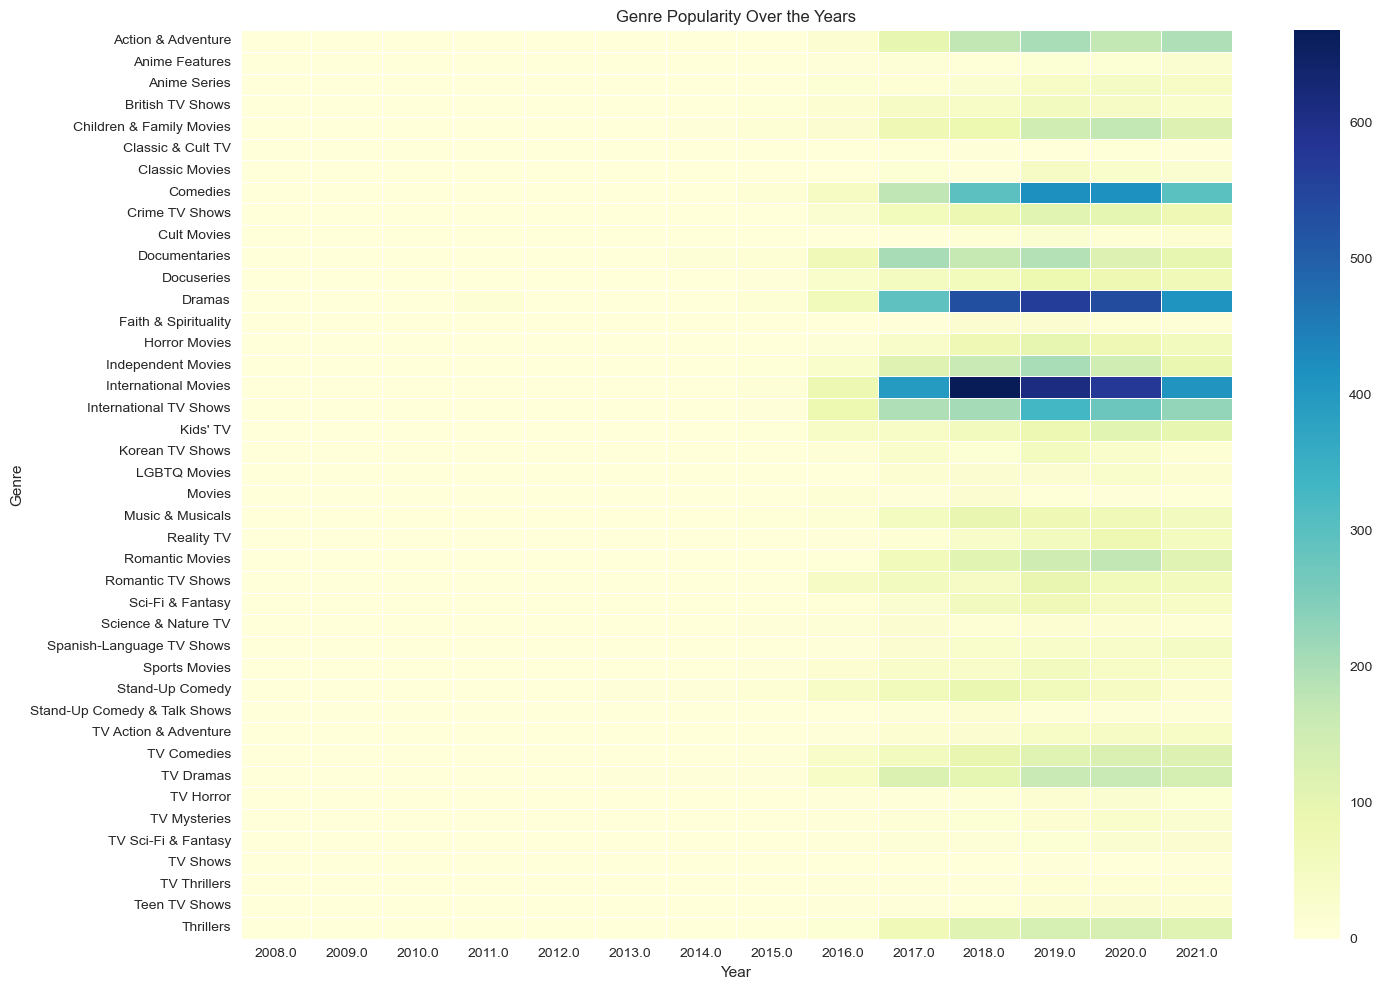

In [36]:
# Explode genres and keep year_added
genre_year_df = df[['year_added', 'listed_in']].copy()
genre_year_df = genre_year_df[genre_year_df['year_added'].notnull()]
genre_year_df['listed_in'] = genre_year_df['listed_in'].str.split(', ')
genre_year_df = genre_year_df.explode('listed_in')

# Group by genre and year
genre_trends = genre_year_df.groupby(['year_added', 'listed_in']).size().reset_index(name='count')

# Pivot for heatmap
genre_pivot = genre_trends.pivot(index='listed_in', columns='year_added', values='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(genre_pivot, cmap='YlGnBu', linewidths=0.5)
plt.title("Genre Popularity Over the Years")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
